In [1]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import requests
from collections import Counter
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.analys import stat
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', 500)
df = pd.read_csv('Pima.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Overall understanding of the data

In [836]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [842]:
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
dtype: object

In [843]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [844]:
#print the shape of dataframe
df.shape

(768, 9)

In [3]:
# class count
class_count_0, class_count_1 = df['Outcome'].value_counts()

# Separate class
class_0 = df[df['Outcome'] == 0]
class_1 = df[df['Outcome'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (500, 9)
class 1: (268, 9)


total class of 1 and0: 0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

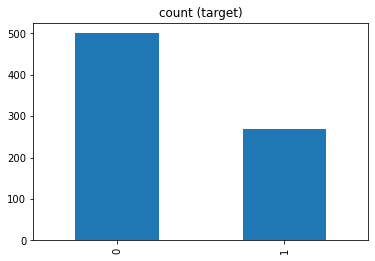

In [6]:
print("total class of 1 and0:",df['Outcome'].value_counts())# plot the count after under-sampeling
df['Outcome'].value_counts().plot(kind='bar', title='count (target)')

In [845]:
df[['Glucose ','BloodPressure','SkinThickness','Insulin ','BMI']] =  df[['Glucose ','BloodPressure','SkinThickness','Insulin ','BMI']].replace(0, np.NaN)
print(df.isnull().sum())

Pregnancies                    0
Glucose                        5
BloodPressure                 35
SkinThickness                227
Insulin                      374
BMI                           11
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


In [846]:
p=df.isnull().sum() / df.shape[0]
p

Pregnancies                  0.000000
Glucose                      0.006510
BloodPressure                0.045573
SkinThickness                0.295573
Insulin                      0.486979
BMI                          0.014323
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

From the result above we note that these features have more than 05% missing data
-Remove the rows containing the missing values if less than 5% of values are missing in a column, the column Bloodpressure and BMI has less than 5% missing , So we will proceed to delete those missing rows 

In [847]:
df = df.dropna(subset=['BloodPressure'])
df = df.dropna(subset=['BMI'])
df = df.dropna(subset=['Glucose '])

# Use KNN to input the missing data 

In [848]:
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(df)
# transform the dataset
df_filled = imputer.transform(df)
df_filled = pd.DataFrame(df_filled)
#df_filled.info()
df2 = df_filled.rename({0: 'Pregnancies', 1: 'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin', 5:'BMI',6:'DBF',7:'Age',8:'Outcome'}, axis=1)  # new method
#BMI	DiabetesPedigreeFunction	Age	Outcome
df2.head()
# print total missing
df2.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DBF              0
Age              0
Outcome          0
dtype: int64

# Find outliers in data 

C:\Users\merie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\merie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

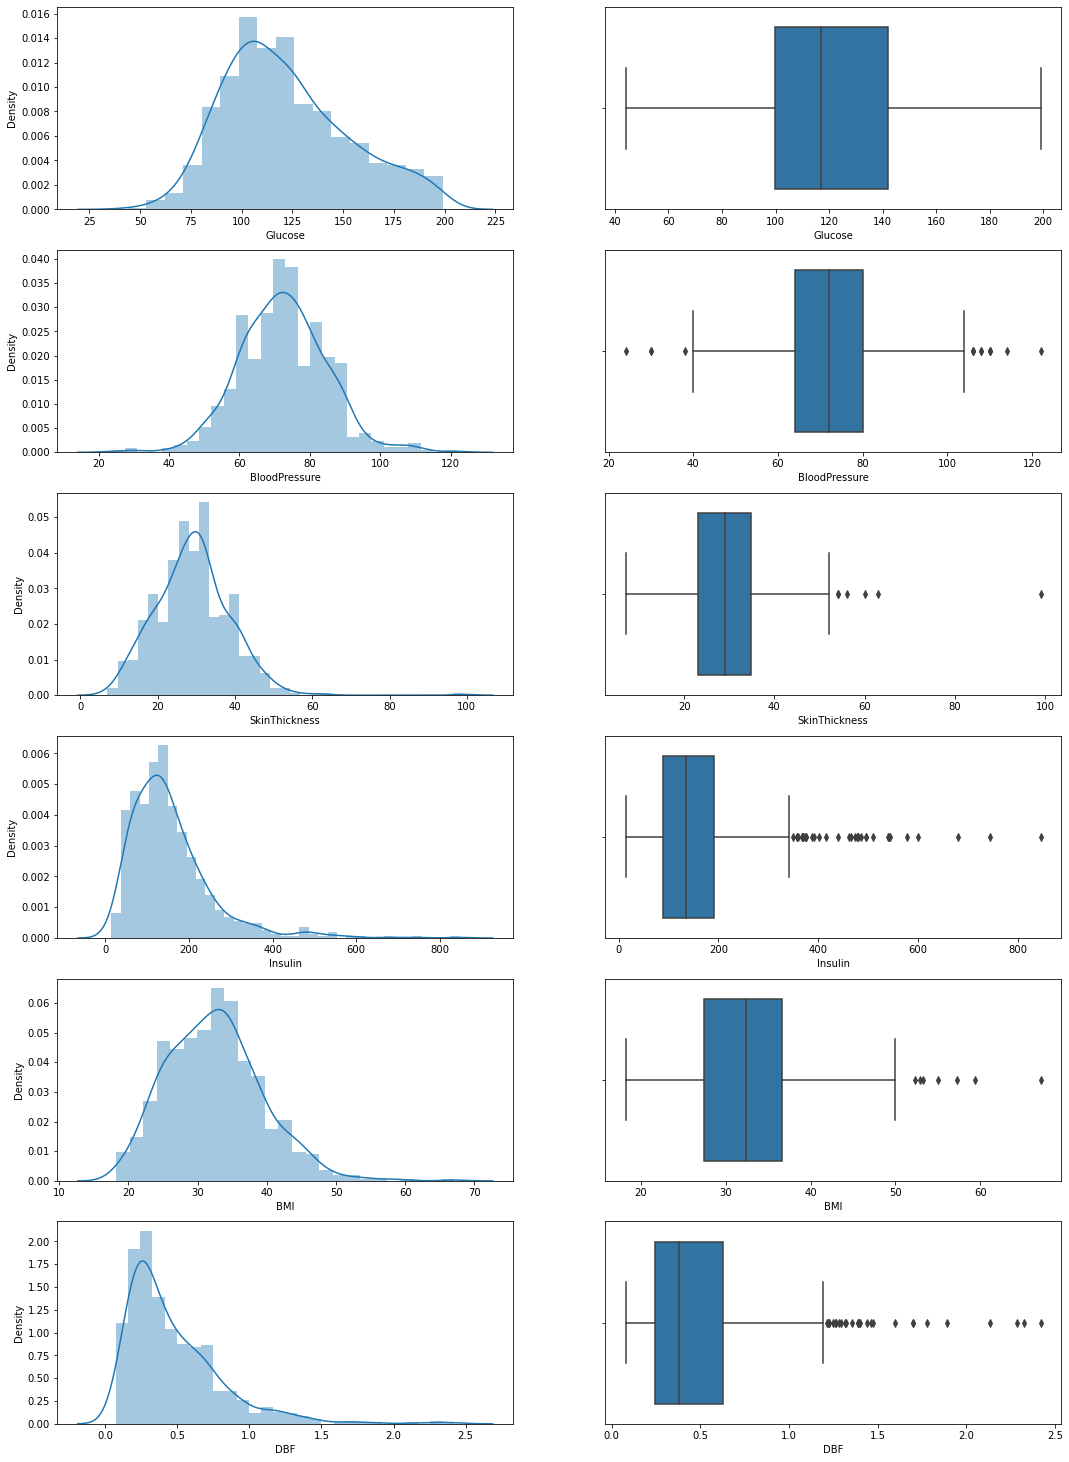

In [849]:
plt.figure(figsize=(18,35))

plt.subplot(8,2,3)
sns.distplot(df2['Glucose'])
plt.subplot(8,2,4)
sns.boxplot(df2['Glucose'])
plt.subplot(8,2,5) #histogram
sns.distplot(df2['BloodPressure'])
plt.subplot(8,2,6)
sns.boxplot(df2['BloodPressure'])
plt.subplot(8,2,7) #histogram
sns.distplot(df2['SkinThickness'])
plt.subplot(8,2,8)
sns.boxplot(df2['SkinThickness'])
plt.subplot(8,2,9) #histogram
sns.distplot(df2['Insulin'])
plt.subplot(8,2,10)
sns.boxplot(df2['Insulin'])
plt.subplot(8,2,11) #histogram
sns.distplot(df2['BMI'])
plt.subplot(8,2,12)
sns.boxplot(df2['BMI'])
plt.subplot(8,2,13) #histogram
sns.distplot(df2['DBF'])
plt.subplot(8,2,14)
sns.boxplot(df2['DBF'])
plt.show()

In [850]:
from collections import Counter
def detect_outliers(df2,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df2[c],25)
        # 3rd quartile
        Q3 = np.percentile(df2[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df2[(df2[c] < Q1 - outlier_step) | (df2[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [851]:
df2.loc[detect_outliers(df2,[ 'Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DBF','Age'])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DBF,Age,Outcome
418,0.0,180.0,78.0,63.0,14.0,59.4,2.42,25.0,1.0


In [852]:
df2 = df2.drop(detect_outliers(df2,[ 'Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DBF']),axis = 0).reset_index(drop = True)

In [853]:
df2.drop(df2.index[df2['Insulin'] > 400.0], inplace = True)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DBF,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
718,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
719,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0
720,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
721,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0


In [854]:
df2.drop(df2.index[df2['DBF'] > 1.0], inplace = True)
#df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DBF,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,5.0,116.0,74.0,20.6,102.8,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
718,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
719,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,0.0
720,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
721,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1.0


In [855]:
df2.drop(df2.index[df2['SkinThickness'] > 50], inplace = True)
#df2

In [856]:
df2.drop(df2.index[df2['BMI'] > 50], inplace = True)
#df2

In [857]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DBF,Age,Outcome
count,644.000000,644.00000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,3.900621,119.76087,72.049689,28.339441,141.493478,31.876708,0.407508,33.133540,0.315217
std,3.331279,29.55121,12.166318,8.612862,73.210924,6.345578,0.219611,11.749228,0.464964
min,0.000000,44.00000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.00000,64.000000,22.700000,87.450000,27.300000,0.237750,24.000000,0.000000
50%,3.000000,114.00000,72.000000,29.000000,130.000000,32.000000,0.346000,29.000000,0.000000
75%,6.000000,138.00000,80.000000,33.450000,181.850000,35.800000,0.557000,40.250000,1.000000
max,17.000000,198.00000,122.000000,50.000000,392.000000,50.000000,0.997000,81.000000,1.000000


# Relevant Feature

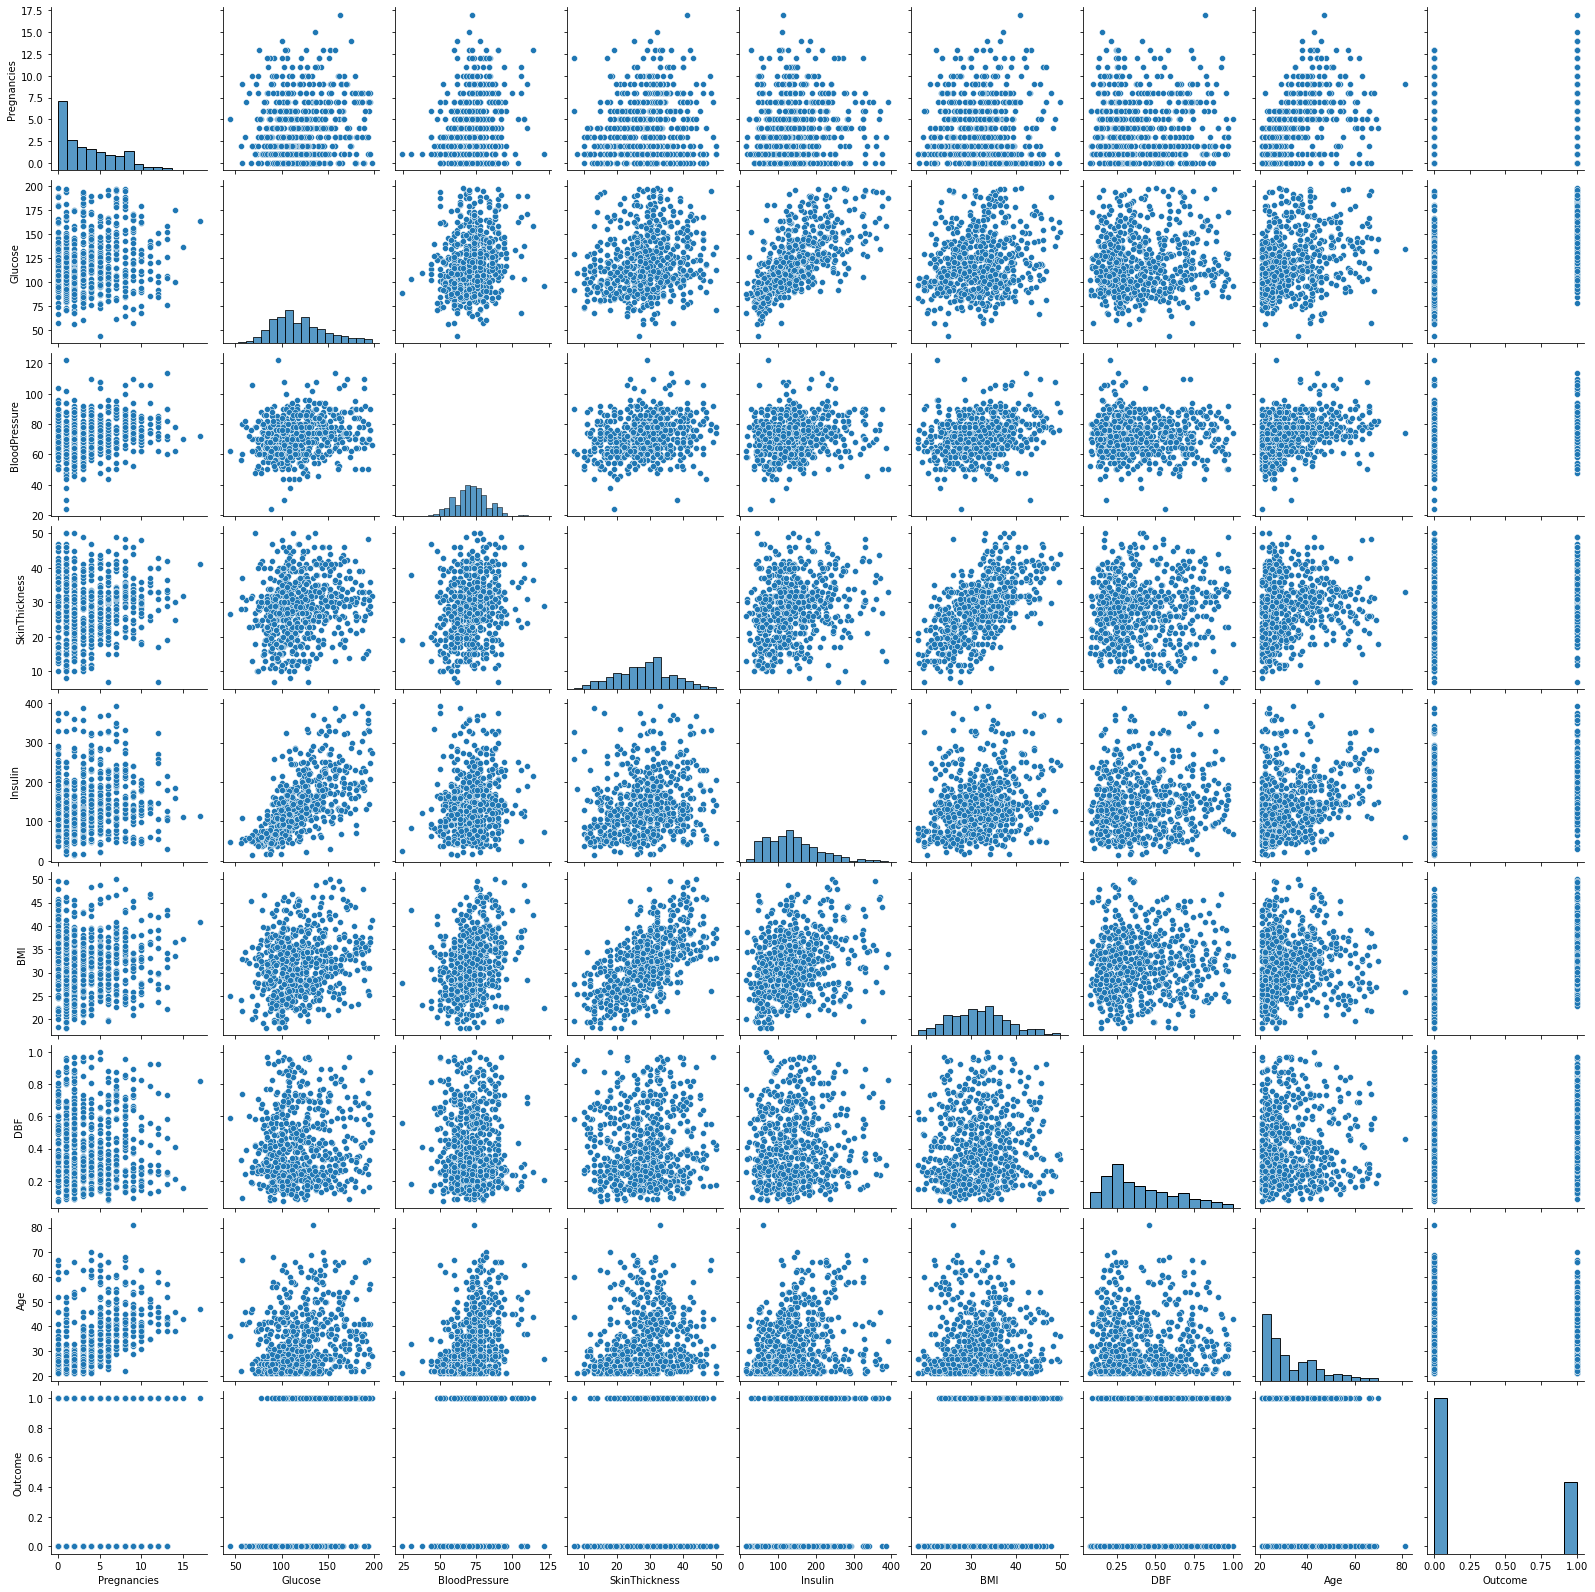

In [858]:
seaborn.pairplot(df2)
plt.show()

# Correlation 

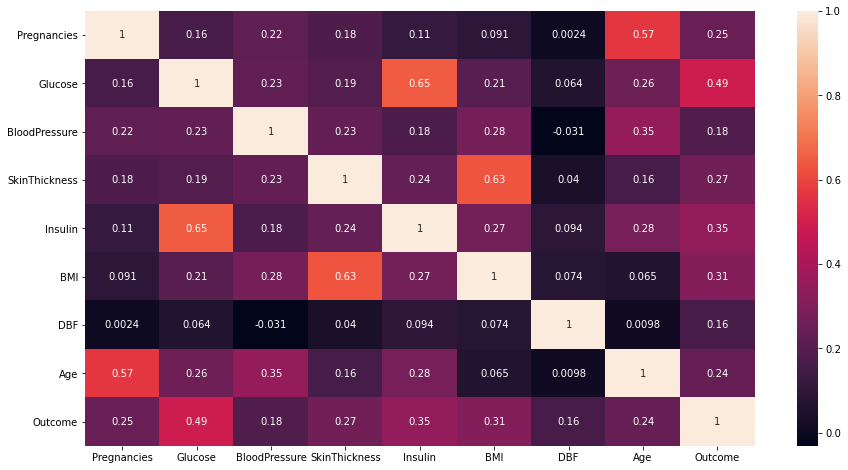

In [959]:
fig = plt.figure(figsize=(15, 8))
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True)

plt.show()

# Null Hypothesis

Most of the studies related on the correlation coeffecient, the chi square is processed in my analysis to wether follow the reuslt of the coeffecient or not of the less correlated variables : preganancies , Blood pressure, Age , sckinthickness


In [861]:
cross=pd.crosstab(df2.Outcome,df2.BloodPressure)
res = stat ()
res.chisq(df=cross)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson           43       52.0125  0.163052
Log-likelihood    43       62.0722  0.0298755



In [862]:
cross=pd.crosstab(df2.Outcome,df2.Age )
res = stat ()
res.chisq(df=cross)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson           50       130.895  3.61438e-09
Log-likelihood    50       136.389  6.08482e-10



In [863]:
cross=pd.crosstab(df2.Outcome,df2.Pregnancies )
res = stat ()
res.chisq(df=cross)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson           16       59.8596  5.52651e-07
Log-likelihood    16       60.2529  4.7443e-07



In [864]:
cross=pd.crosstab(df2.Outcome,df2.SkinThickness )
res = stat ()
res.chisq(df=cross)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson          114       137.378  0.0671977
Log-likelihood   114       164.052  0.0014982



In [865]:
cross=pd.crosstab(df2.Outcome,df2.DBF )
res = stat ()
res.chisq(df=cross)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square     P-value
--------------  ----  ------------  ----------
Pearson          431       438.384  0.392521
Log-likelihood   431       552.502  6.5304e-05



if chi_square > critical_value: conclusion = "Null Hypothesis is rejected."

From the above data we can see that most of the data has outliers except Glucose

In [960]:
X = df2[[ 'Glucose', 'Pregnancies', 'Age','Insulin', 'BMI']]
y = df2['Outcome']

In [961]:
X.describe()

,Glucose,Pregnancies,Age,Insulin,BMI
count,644.00000,644.000000,644.000000,644.000000,644.000000
mean,119.76087,3.900621,33.133540,141.493478,31.876708
std,29.55121,3.331279,11.749228,73.210924,6.345578
min,44.00000,0.000000,21.000000,15.000000,18.200000
25%,99.00000,1.000000,24.000000,87.450000,27.300000
50%,114.00000,3.000000,29.000000,130.000000,32.000000
75%,138.00000,6.000000,40.250000,181.850000,35.800000
max,198.00000,17.000000,81.000000,392.000000,50.000000


In [872]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) 

# Model on imbalanced Dataset without any scaling 

# Logistique regression

In [873]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [874]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[79,  5],
       [17, 28]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

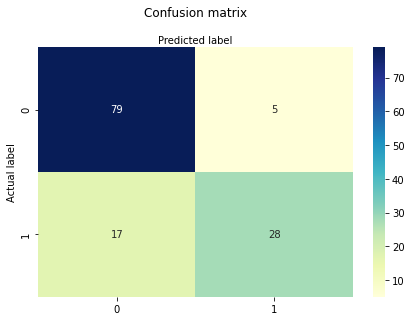

In [875]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [876]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8294573643410853
Precision: 0.8484848484848485
Recall: 0.6222222222222222


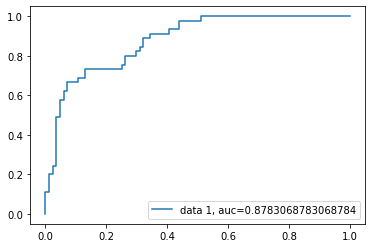

In [877]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM

In [878]:
from sklearn.svm import SVC
classifier1 = SVC(random_state=0, kernel='rbf')
classifier1.fit(X_train, y_train)

SVC(random_state=0)

In [879]:
# fit the model with data
classifier1.fit(X_train,y_train)
#
y_pred1=classifier.predict(X_test)

In [880]:
cm1 = confusion_matrix(y_test, y_pred1)
print (cm)


[[80  4]
 [21 24]]


Text(0.5, 257.44, 'Predicted label')

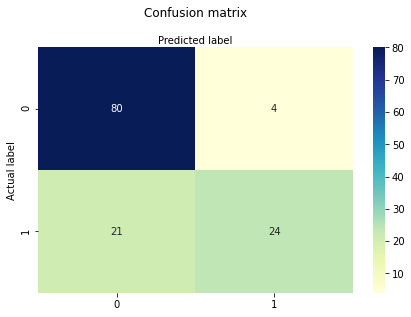

In [881]:
cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred1)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [882]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

Accuracy: 0.8062015503875969
Precision: 0.8571428571428571
Recall: 0.5333333333333333


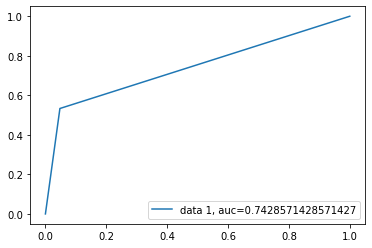

In [883]:
y_pred_proba1 =classifier1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision tree

In [884]:

classifier2 = DecisionTreeClassifier(random_state=0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

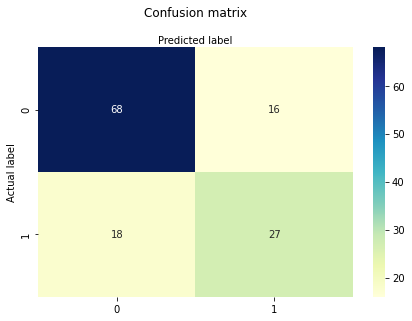

In [885]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [886]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

Accuracy: 0.7364341085271318
Precision: 0.627906976744186
Recall: 0.6


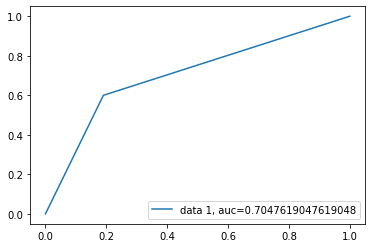

In [887]:
y_pred_proba2 =classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc = metrics.roc_auc_score(y_test, y_pred_proba2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest 

In [888]:
#Create a Gaussian Classifier
classifier3=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier3.fit(X_train,y_train)

y_pred3=classifier3.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

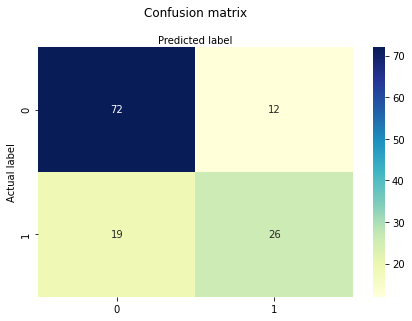

In [889]:
cnf_matrix3 = metrics.confusion_matrix(y_test, y_pred3)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [890]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision:",metrics.precision_score(y_test, y_pred3))
print("Recall:",metrics.recall_score(y_test, y_pred3))

Accuracy: 0.7596899224806202
Precision: 0.6842105263157895
Recall: 0.5777777777777777


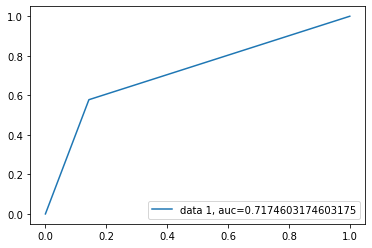

In [891]:
y_pred_proba3 =classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba3)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Scaling the data 

In [892]:
X = df2[[ 'Glucose', 'Pregnancies', 'Age','Insulin', 'BMI']]
y = df2['Outcome']

In [893]:
Scaler=StandardScaler()
Scaler.fit(X)

StandardScaler()

In [894]:
X= Scaler.transform(X)
X

array([[ 0.95634261,  0.63069197,  1.4366536 ,  0.37600813,  0.27178476],
       [-1.17720695, -0.87139985, -0.18173099, -1.1331357 , -0.83220308],
       [ 2.14164792,  1.23152869, -0.09655286,  0.31586109, -1.35265449],
       ...,
       [ 0.04196423,  0.3302736 , -0.26690913, -0.40316939, -0.8952881 ],
       [ 0.21129356, -0.87139985,  1.18111919, -0.09970025, -0.28020916],
       [-0.90628002, -0.87139985, -0.86315608, -1.02377745, -0.23289539]])

In [895]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) 

# Model on imbalanced Dataset with scaling 

# Logisitique regression on imbalanced dataset  with scaling 

In [896]:
# instantiate the model (using the default parameters)
classifier4 = LogisticRegression()

# fit the model with data
classifier4.fit(X_train,y_train)

#
y_pred4=classifier4.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

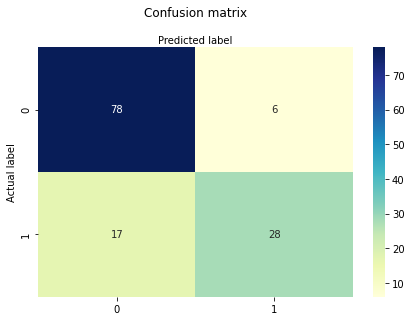

In [897]:
cnf_matrix4 = metrics.confusion_matrix(y_test, y_pred4)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [899]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4))

Accuracy: 0.8217054263565892
Precision: 0.8235294117647058
Recall: 0.6222222222222222


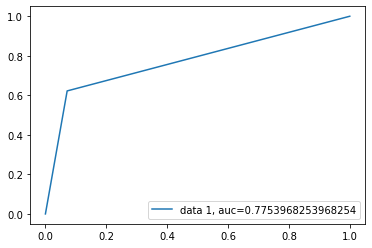

In [900]:
y_pred_proba4 =classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba4)
auc = metrics.roc_auc_score(y_test, y_pred_proba4)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM 

In [901]:
classifier5 = SVC(random_state=0, kernel='rbf')
classifier5.fit(X_train, y_train)
y_pred5=classifier5.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

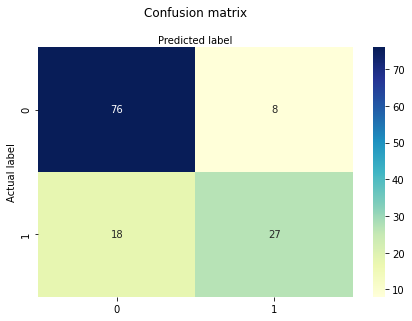

In [902]:
cnf_matrix5 = metrics.confusion_matrix(y_test, y_pred5)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [903]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))
print("Precision:",metrics.precision_score(y_test, y_pred5))
print("Recall:",metrics.recall_score(y_test, y_pred5))

Accuracy: 0.7984496124031008
Precision: 0.7714285714285715
Recall: 0.6


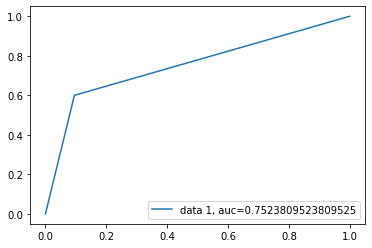

In [904]:
y_pred_proba5 =classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba5)
auc = metrics.roc_auc_score(y_test, y_pred_proba5)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision Tree 

In [905]:
classifier6 = DecisionTreeClassifier(random_state=0)
classifier6.fit(X_train, y_train)
y_pred6=classifier6.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

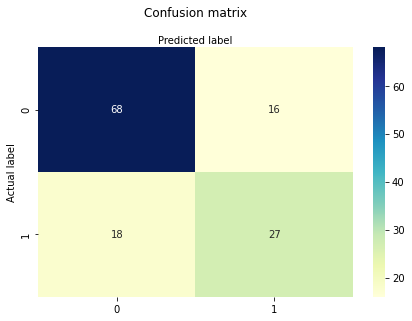

In [906]:
cnf_matrix6 = metrics.confusion_matrix(y_test, y_pred6)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [907]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))
print("Precision:",metrics.precision_score(y_test, y_pred6))
print("Recall:",metrics.recall_score(y_test, y_pred6))

Accuracy: 0.7364341085271318
Precision: 0.627906976744186
Recall: 0.6


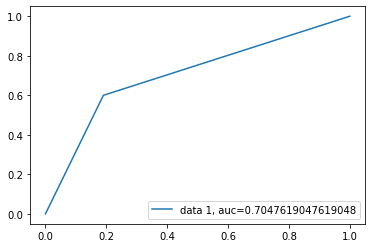

In [908]:
y_pred_proba6 =classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba6)
auc = metrics.roc_auc_score(y_test, y_pred_proba6)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest 

In [909]:
classifier7=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier7.fit(X_train,y_train)

y_pred7=classifier7.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

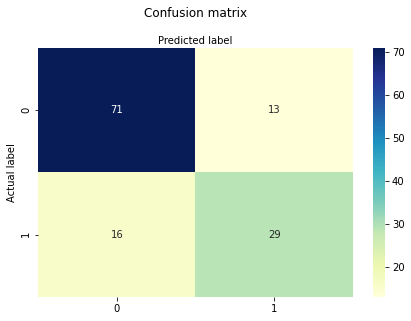

In [910]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred7)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [911]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred7))
print("Precision:",metrics.precision_score(y_test, y_pred7))
print("Recall:",metrics.recall_score(y_test, y_pred7))

Accuracy: 0.7751937984496124
Precision: 0.6904761904761905
Recall: 0.6444444444444445


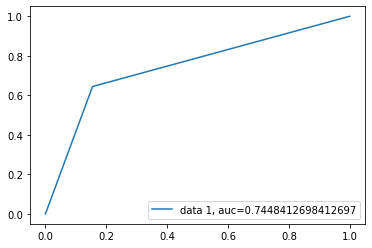

In [912]:
y_pred_proba7 =classifier7.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba7)
auc = metrics.roc_auc_score(y_test, y_pred_proba7)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Balancing the dataset with the undersampling technique

In [962]:
# class count
class_count_0, class_count_1 = df2['Outcome'].value_counts()

# Separate class
class_0 = df2[df2['Outcome'] == 0]
class_1 = df2[df2['Outcome'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (441, 9)
class 1: (203, 9)


total class of 1 and0: 0.0    203
1.0    203
Name: Outcome, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

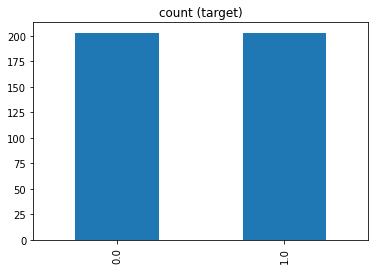

In [914]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Outcome'].value_counts())# plot the count after under-sampeling
test_under['Outcome'].value_counts().plot(kind='bar', title='count (target)')

# Models on balanced  Dataset with unscaled data 

In [921]:
X = test_under[[ 'Glucose', 'Pregnancies', 'Age','Insulin', 'BMI']]
y = test_under['Outcome']

In [922]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) 

# Logistique regression 

In [923]:
# instantiate the model (using the default parameters)
classifier8 = LogisticRegression()

# fit the model with data
classifier8.fit(X_train,y_train)

#
y_pred8=classifier8.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

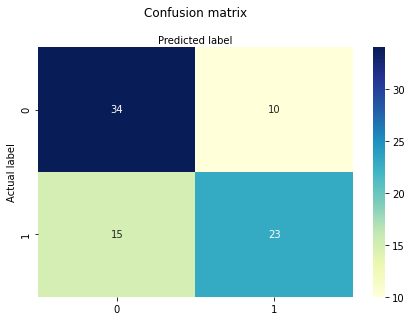

In [924]:
cnf_matrix8 = metrics.confusion_matrix(y_test, y_pred8)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [925]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred8))
print("Precision:",metrics.precision_score(y_test, y_pred8))
print("Recall:",metrics.recall_score(y_test, y_pred8))

Accuracy: 0.6951219512195121
Precision: 0.696969696969697
Recall: 0.6052631578947368


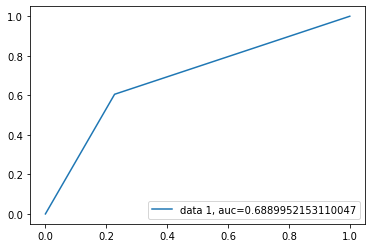

In [926]:
y_pred_proba8 =classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba8)
auc = metrics.roc_auc_score(y_test, y_pred_proba8)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM

In [927]:
classifier9 = SVC(random_state=0, kernel='rbf')
classifier9.fit(X_train, y_train)
y_pred9=classifier9.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

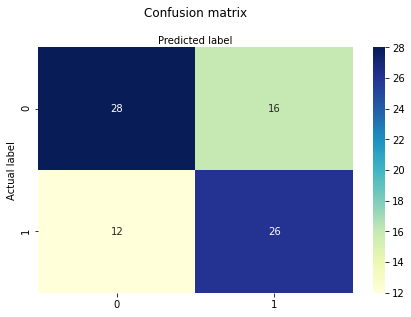

In [928]:
cnf_matrix9 = metrics.confusion_matrix(y_test, y_pred9)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [929]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred9))
print("Precision:",metrics.precision_score(y_test, y_pred9))
print("Recall:",metrics.recall_score(y_test, y_pred9))

Accuracy: 0.6585365853658537
Precision: 0.6190476190476191
Recall: 0.6842105263157895


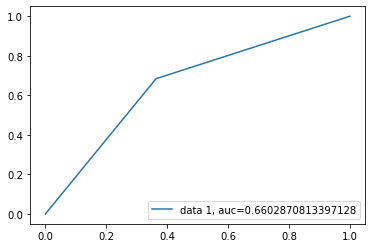

In [930]:
y_pred_proba9 =classifier9.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba9)
auc = metrics.roc_auc_score(y_test, y_pred_proba9)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision tree

In [931]:

classifier10 = DecisionTreeClassifier(random_state=0)
classifier10.fit(X_train, y_train)
y_pred10 = classifier10.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

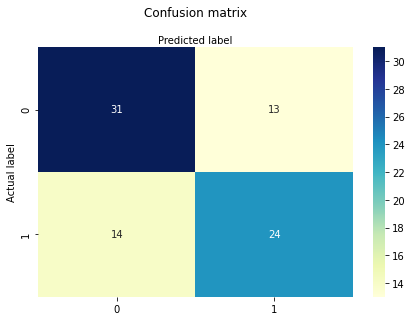

In [932]:
cnf_matrix10 = metrics.confusion_matrix(y_test, y_pred10)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [933]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred10))
print("Precision:",metrics.precision_score(y_test, y_pred10))
print("Recall:",metrics.recall_score(y_test, y_pred10))

Accuracy: 0.6707317073170732
Precision: 0.6486486486486487
Recall: 0.631578947368421


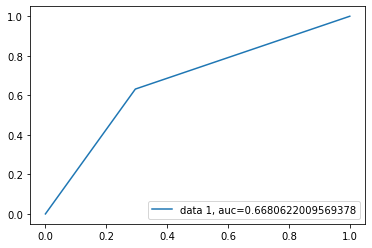

In [934]:
y_pred_proba10 =classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba10)
auc = metrics.roc_auc_score(y_test, y_pred_proba10)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

In [935]:
#Create a Gaussian Classifier
classifier11=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier11.fit(X_train,y_train)

y_pred11=classifier11.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

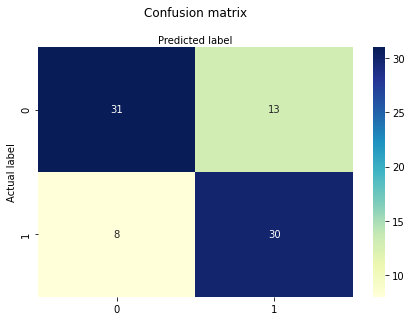

In [936]:
cnf_matrix11 = metrics.confusion_matrix(y_test, y_pred11)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [937]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred11))
print("Precision:",metrics.precision_score(y_test, y_pred11))
print("Recall:",metrics.recall_score(y_test, y_pred11))

Accuracy: 0.7439024390243902
Precision: 0.6976744186046512
Recall: 0.7894736842105263


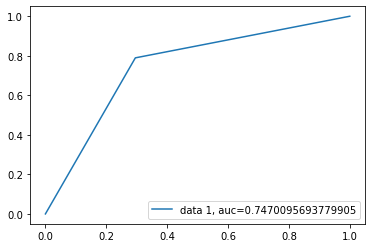

In [938]:
y_pred_proba11 =classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba11)
auc = metrics.roc_auc_score(y_test, y_pred_proba11)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Undersampling on scaled data 

In [939]:
X = test_under[[ 'Glucose', 'Pregnancies', 'Age','Insulin', 'BMI']]
y = test_under['Outcome']

In [940]:
Scaler=StandardScaler()
Scaler.fit(X)

StandardScaler()

In [941]:
X= Scaler.transform(X)
X

array([[-0.52135248, -0.62612848, -0.64709258, -0.37114263, -0.04246523],
       [-0.55439996, -0.90702147, -0.73385598, -0.43786416, -1.51889436],
       [-1.54582435, -0.90702147, -1.08090959, -1.54544159, -1.15375597],
       ...,
       [ 2.12244589,  0.49744351,  2.73668016,  0.98997662,  0.44967782],
       [ 1.4614963 ,  1.3401225 ,  0.74112188,  1.15277716,  1.7991023 ],
       [ 0.00740719, -0.90702147,  1.0881755 , -0.24837501, -0.40760362]])

In [942]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) 

# Models on balanced  Dataset with scaled data 

# Logistique regression , undersampling and scaled 

In [943]:
classifier12 = LogisticRegression()

# fit the model with data
classifier12.fit(X_train,y_train)

#
y_pred12=classifier12.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

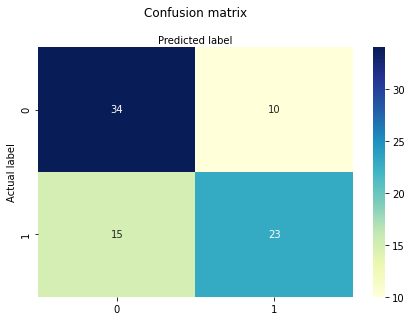

In [944]:
cnf_matrix12 = metrics.confusion_matrix(y_test, y_pred12)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [945]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred12))
print("Precision:",metrics.precision_score(y_test, y_pred12))
print("Recall:",metrics.recall_score(y_test, y_pred12))

Accuracy: 0.6951219512195121
Precision: 0.696969696969697
Recall: 0.6052631578947368


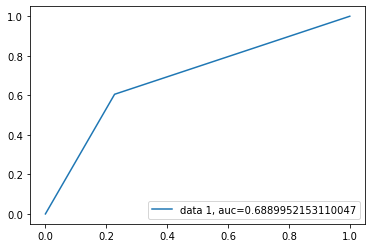

In [946]:
y_pred_proba12 =classifier12.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba12)
auc = metrics.roc_auc_score(y_test, y_pred_proba12)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM , undersampling and scaled 

In [947]:
classifier13 = SVC(random_state=0, kernel='rbf')
classifier13.fit(X_train, y_train)
y_pred13=classifier13.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

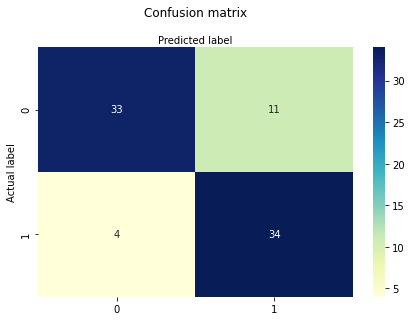

In [948]:
cnf_matrix13 = metrics.confusion_matrix(y_test, y_pred13)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [949]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred13))
print("Precision:",metrics.precision_score(y_test, y_pred13))
print("Recall:",metrics.recall_score(y_test, y_pred13))

Accuracy: 0.8170731707317073
Precision: 0.7555555555555555
Recall: 0.8947368421052632


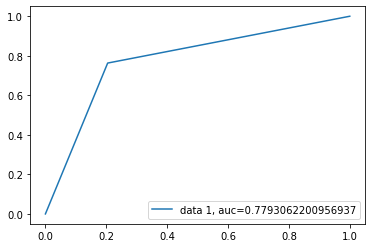

In [826]:
y_pred_proba13 =classifier13.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba13)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision tree

In [950]:
classifier14 = DecisionTreeClassifier(random_state=0)
classifier14.fit(X_train, y_train)
y_pred14 = classifier.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

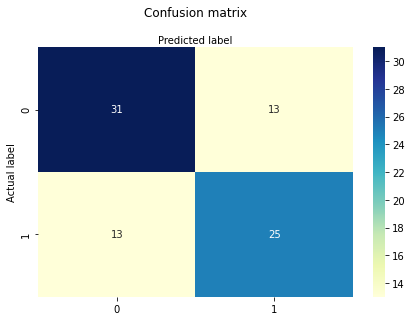

In [951]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred14)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [952]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred14))
print("Precision:",metrics.precision_score(y_test, y_pred14))
print("Recall:",metrics.recall_score(y_test, y_pred14))

Accuracy: 0.6829268292682927
Precision: 0.6578947368421053
Recall: 0.6578947368421053


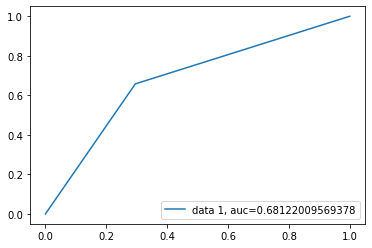

In [953]:
y_pred_proba14 =classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba14)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

In [954]:
#Create a Gaussian Classifier
classifier15=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier15.fit(X_train,y_train)

y_pred15=classifier15.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

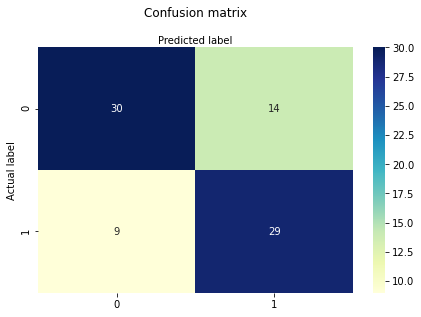

In [955]:
cnf_matrix15 = metrics.confusion_matrix(y_test, y_pred15)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [956]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred15))
print("Precision:",metrics.precision_score(y_test, y_pred15))
print("Recall:",metrics.recall_score(y_test, y_pred15))

Accuracy: 0.7195121951219512
Precision: 0.6744186046511628
Recall: 0.7631578947368421


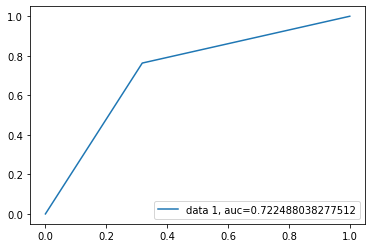

In [957]:
y_pred_proba15 =classifier.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba15)
auc = metrics.roc_auc_score(y_test, y_pred_proba15)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()